<a href="https://colab.research.google.com/github/archakamk/SWAT/blob/main/SWAT_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd

# set column names within our data set
column_names = ['sentiment_label', 'headline']

file_path = '/content/data.csv'

df = pd.read_csv(file_path, encoding="latin1", names=column_names)

# display first few rows of data set
df.head()

,sentiment_label,headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment_label  4846 non-null   object
 1   headline         4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None
  sentiment_label                                           headline
0         neutral  According to Gran , the company has no plans t...
1         neutral  Technopolis plans to develop in stages an area...
2        negative  The international electronic industry company ...
3        positive  With the new production plant the company woul...
4        positive  According to the company 's updated strategy f...


In [115]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# cleaning text in the headline column.
def clean_text(text):
  text = text.lower() # converts to lowercase
  text = re.sub(r'\s+', ' ', text)
  text = re.sub(r'[^\w\s]', '', text)
  return text

df['cleaned_text'] = df['headline'].apply(clean_text)

stop_words = set(stopwords.words('english'))

# gets rid of certain unneeded words in the headlines
def remove_stopwords(text):
  return ' '.join([word for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

# display first few headlines that are cleaned compared to original headlines column.
df[['headline', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,headline,cleaned_text
0,"According to Gran , the company has no plans t...",according gran company plans move production r...
1,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less 100...
2,The international electronic industry company ...,international electronic industry company elco...
3,With the new production plant the company woul...,new production plant company would increase ca...
4,According to the company 's updated strategy f...,according company updated strategy years 20092...


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# store values from each column into different variable
X = df['cleaned_text']
y = df['sentiment_label']

# split our data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# make a vectorizer to transform/fit our data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# make model for regression and fit the model
model = LogisticRegression()
model.fit(X_train_vectorized, Y_train)

# predict the model using vectorized test data
y_pred = model.predict(X_test_vectorized)

# compute accuracy of model and display
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(Y_test, y_pred))


Accuracy: 0.7454
Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.43      0.56       110
     neutral       0.73      0.95      0.83       571
    positive       0.79      0.46      0.58       289

    accuracy                           0.75       970
   macro avg       0.77      0.61      0.65       970
weighted avg       0.76      0.75      0.72       970



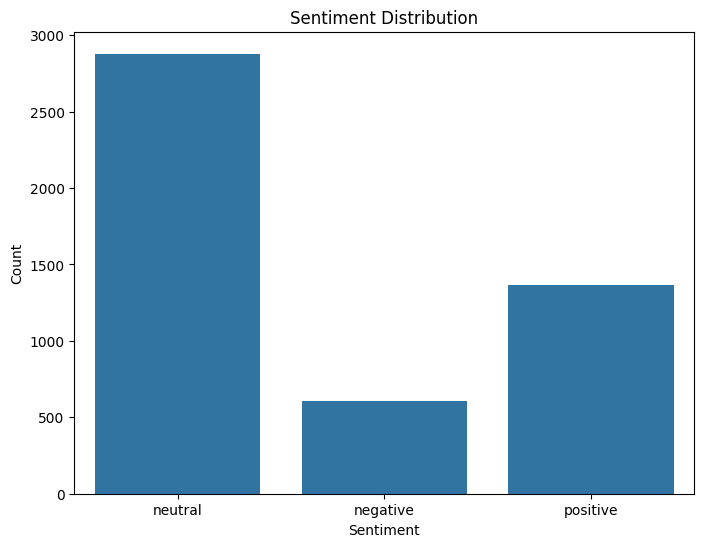

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of sentiment labels
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Check if there's a 'date' column for time-series sentiment analysis
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])  # Convert date to datetime if not already
    df['year_month'] = df['date'].dt.to_period('M')

    # Calculate average sentiment score per month
    sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
    df['sentiment_score'] = df['sentiment_label'].map(sentiment_mapping)

    monthly_sentiment = df.groupby('year_month')['sentiment_score'].mean()

    # Plot sentiment trends over time
    plt.figure(figsize=(12, 6))
    monthly_sentiment.plot()
    plt.title('Monthly Sentiment Trends')
    plt.xlabel('Month')
    plt.ylabel('Average Sentiment Score')
    plt.show()

In [ ]:
# As we can see, there are a lot more neutral sentiments in our data set, which may make our regression model
# more biased towards neutral headlines. This is evident because the recall accuracy on our model is
# significantly greater for neutral compared to negative and positive.

In [ ]:
import numpy as np

# Create a time index assuming data is in chronological order
df['time_index'] = np.arange(len(df))

sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sentiment_score'] = df['sentiment_label'].map(sentiment_mapping)

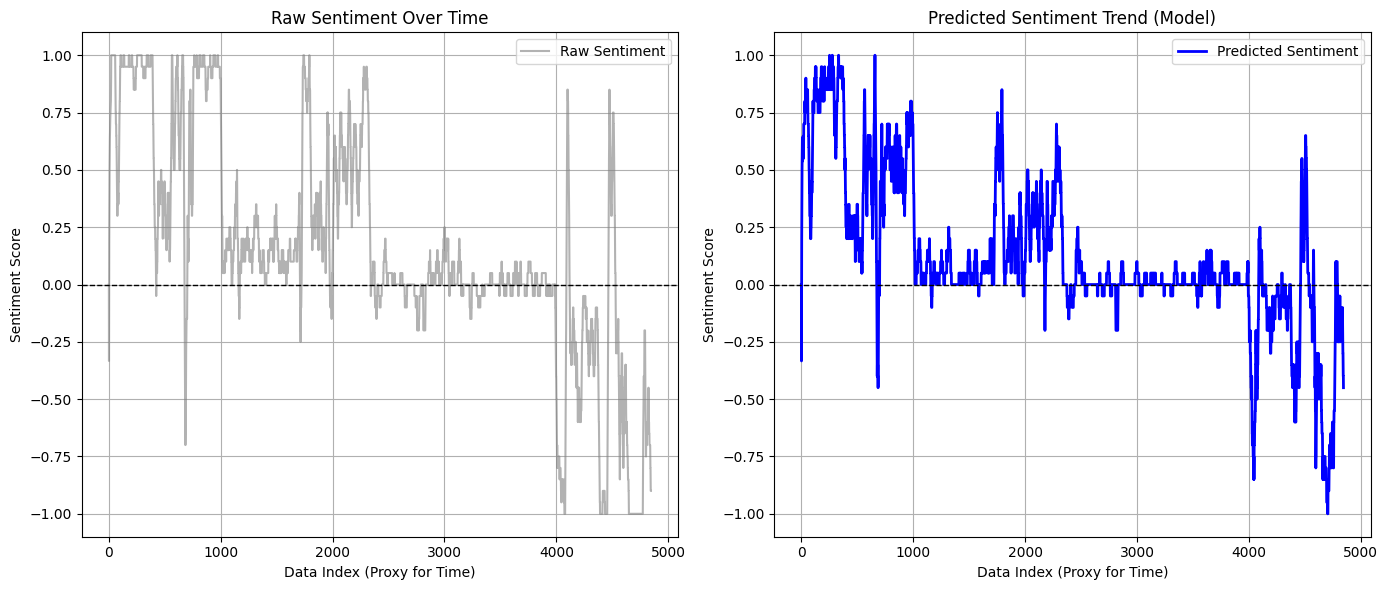

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure sentiment scores are numerical
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sentiment_score'] = df['sentiment_label'].map(sentiment_mapping)

# Vectorize the entire dataset (same as how we did for training)
X_vectorized = vectorizer.transform(df['cleaned_text'])

# Predict sentiment using the trained model
df['predicted_sentiment'] = model.predict(X_vectorized)

# Map model predictions to numerical values
df['predicted_score'] = df['predicted_sentiment'].map(sentiment_mapping)

# Apply rolling average to both raw sentiment and predicted sentiment
df['rolling_raw_sentiment'] = df['sentiment_score'].rolling(window=20, min_periods=1).mean()
df['rolling_predicted_sentiment'] = df['predicted_score'].rolling(window=20, min_periods=1).mean()

# Plot the comparison of raw vs predicted sentiment
plt.figure(figsize=(14, 6))

# Raw sentiment plot
plt.subplot(1, 2, 1)
plt.plot(df['time_index'], df['rolling_raw_sentiment'], color='gray', alpha=0.6, label='Raw Sentiment')
plt.title('Raw Sentiment Over Time')
plt.xlabel('Data Index (Proxy for Time)')
plt.ylabel('Sentiment Score')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Neutral line
plt.grid(True)
plt.legend()

# Predicted sentiment plot (now smoothed)
plt.subplot(1, 2, 2)
plt.plot(df['time_index'], df['rolling_predicted_sentiment'], color='blue', linewidth=2, label='Predicted Sentiment')
plt.title('Predicted Sentiment Trend (Model)')
plt.xlabel('Data Index (Proxy for Time)')
plt.ylabel('Sentiment Score')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Neutral line
plt.grid(True)
plt.legend()

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [126]:
# Here, we can see how the model is predicting certain sentiment values over the period
# of the entire dataset.

## Market Sentiment Trend Analysis  

### Fluctuations in Sentiment  
- The sentiment scores show noticeable fluctuations, with alternating periods of positive and negative sentiment.  
- There are spikes where sentiment becomes sharply negative, which may relate to major events or market downturns.  
- Similarly, some periods show consistent positive sentiment, probably representing optimistic news cycles.  

### Dominance of Neutral Sentiment  
- The majority of sentiment scores are neutral, which suggests that financial headlines often maintain a balanced tone rather than extreme positivw or negative.  
- This could mean that most financial news is factual and analytical instead of fueled by emotion.  

### Possible Cyclical Trends  
- If the dataset spans a long period, we could possibly see repeating patterns, where sentiment dips and goes back up cyclically, reflecting earnings seasons, economic cycles, or market events.  

---

## Potential Applications in Finance  

Sentiment analysis of financial news can be valuable for market prediction, risk management, and trading strategies (including option and day trading). Investors can monitor sentiment trends to anticipate market movements, while hedge funds may adjust portfolios based on sentiment shifts. Analyzing sentiment alongside stock prices can uncover correlations, helping traders make data-driven decisions. Media agencies can also assess the impact of financial reporting on public perception and market behavior.
